# Understanding K-Means algorithm using Scikit learn library

#### What is Clustering?

Clustering is the task of segmenting a set of data into distinct groups such that the data points in the same group will bear similar characteristics as opposed those data points which lie in the groups/clusters. Our main objective here is to segregate groups having similar characteristics assign them unique clusters.

- The points present in the same cluster should have similar properties

- The points present in the different clusters should be as dissimilar as possible

#### What is K-Means algorithm?

K-Means Clustering comes under the category of Unsupervised Machine Learning algorithms, these algorithms group an unlabeled dataset into distinct clusters. The K defines the number of pre-defined clusters that need to be created, for instance, if K=2, there will be 2 clusters, similarly for K=3, there will be three clusters. The primary goal while implementing k-means involves defining k clusters such that total within-cluster variation (or error) is minimum.

The cluster center is the arithmetic mean of all the data points that belong to that cluster. The squared distance between every given point and its cluster center is called variation. The goal of the k-means clustering is to ascertain these k clusters and their centers whilst reducing the total error.

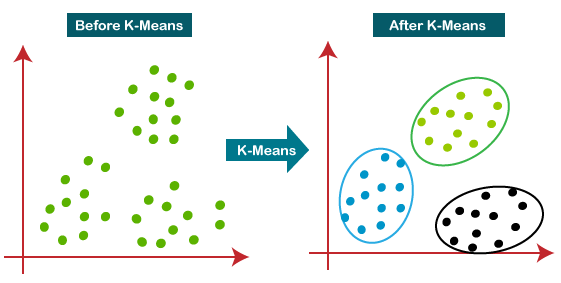

#### How does the K-Means algorithm work?

`Step-1`: To decide the number of clusters, we select an appropriate value of `K`.

`Step-2`: Now choose random `K` points/centroids

`Step-3`: Each data point will be assigned to its nearest centroid and this will form a predefined cluster.

`Step-4`: Now we shall calculate variance and position a new centroid for every cluster.

`Step-5`: The 3rd step will be repeated, meaning, every data point will be assigned to the new nearest centroid.

`Step-6`: If a reassignment has occurred then step-4 shall be executed otherwise execution finishes.

`Step-7`: Finally, the model is ready

# Examples of K-Means Clustering in Python Sklearn

#### Import Libraries

In [13]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt

#### Load Dataset

In [14]:
df = pd.read_csv(r"../Datasets/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Rename the Column name `Genre` to `Gender`

In [15]:
df.rename(columns = {'Genre':'Gender'}, inplace = True)

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.shape

(200, 5)

#### Dataset description

The above Mall_Customers dataset holds the below columns:

- `CustomerID`

- `Gender`

- `Age`

- `Annual Income` 

- `Spending Score`

The dataset holds `200` customer records and `5` fields

#### Objective

Customer segmentation deals with grouping clusters together based on some common patterns within their attributes. Lets visualize the clustering on a 2-D graph using two attributes `Annual Income` and `Spending Score`

#### Apply Feature Scaling

Feature scaling of the data as a part of data preprocessing is required in K-Means algortithm to produce good result. This is because clustering technique uses distance calculation between the data points. Hence it is proper to bring data of different units under a common scale.

The `Annual Income` and `Spending Score` are normalized using `MinMaxScaler`, and the scaled attributes are store into the new `DataFrame` `df_scale`

In [18]:
scaler = MinMaxScaler() #Scaler definition
scale = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)']);
df_scale.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


#### Applying `K-Means` with Clusters (`K=2`) 

In [19]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

The above result, holds 2 clusters - `0` and `1`

The centroid of the 2 clusters can be identified using the attribute `cluster_centers_` can be used

In [20]:
km.cluster_centers_

array([[0.36929553, 0.31163817],
       [0.37861485, 0.73950929]])

#### Visualizing the clusters

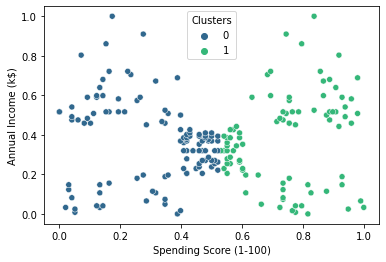

In [21]:
df_scale['Clusters'] = km.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue = 'Clusters', data=df_scale, palette='viridis');

From the above visualization, it is evident that the data can be grouped into more than 2 clusters.

#### Finding optimum number of Clusters in K-Means

Using the below Trial and Error methods, the number of clusters can be calculated

#### i) Elbow Method with Within-Cluster-Sum of Squared Error (WCSS):

For various values of `K`, the Within-Cluster-Sum of Squared Errors (`WCSS`) is calculated, and the `K` for which the `WCSS` starts to diminish is chosen.

- The Squared Error for a data point is the square of the distance of a point from its cluster center.

- The WSS score is the summation of Squared Errors for all given data points.

- Distance metrics like Euclidean Distance or the Manhattan Distance can be used.

Example: For the `K` value 2 to 12, the `WCSS` calculation is done.

In [22]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_ #this inertia attribute calculates the WCSS score
    wss.append(wss_iter)

Visualize the plot, a graph between the `WCSS` and `K` cluster

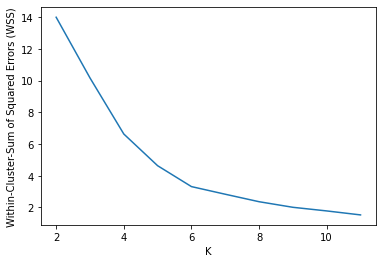

In [23]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss);

From the above plot, it is seen that, there is an elbow bend at `K=5` i.e. it is the point after which `WCSS` does not diminish much with the increase in the value of `K`

#### i) Silhouete Method :

The Silhouete value measures the similarity of a data point within its cluster. It has a range between +1 and -1 and the higher values denote a good clustering.

Let's calculate the Silhouete score for the value k between 2 and 12

In [24]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics

for i in range(2, 13):
    labels = cluster.KMeans(n_clusters=i, random_state=200).fit(df_scale).labels_
    score = metrics.silhouette_score(df_scale, labels, metric="euclidean", sample_size=1000, random_state=200)
    print("Silhoute score for k value : ", str(i), ", is ", str(score))

Silhoute score for k value :  2 , is  0.7162032422193435
Silhoute score for k value :  3 , is  0.5922455653512131
Silhoute score for k value :  4 , is  0.5054154110821062
Silhoute score for k value :  5 , is  0.5469095922434091
Silhoute score for k value :  6 , is  0.5674611319762337
Silhoute score for k value :  7 , is  0.5554290293821631
Silhoute score for k value :  8 , is  0.5429669293190797
Silhoute score for k value :  9 , is  0.5156870591905697
Silhoute score for k value :  10 , is  0.49866312352381104
Silhoute score for k value :  11 , is  0.4966014904550935
Silhoute score for k value :  12 , is  0.5002907802756348


#### Applying Kmeans with 5 Clusters (K=2)

In [26]:
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

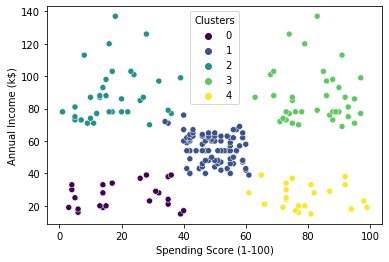

In [28]:
df['Clusters'] = kmeans.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis');

# K Means Clustering in Python Sklearn with Principal Component Analysis

In real world scenarios there can be hundreds of attributes, to visualize the clustering results, the Principal Component Analysis is applied on the dataset to reduce its dimension to only two, while still reserving the information. And then clustering can be applied to this transformed dataset and then visualized in a 2-D plot. Moreover, PCA can also help to avoid the curse of dimensionality.

#### Load Dataset

In [29]:
df = pd.read_csv(r"../Datasets/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Apply Feature Scaling

Apply Feature Scaling on the columns - `Age`, `Annual Income` and `Spending Score`

In [30]:
scaler = MinMaxScaler()

scale = scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

df_scale = pd.DataFrame(scale, columns = ['Age','Annual Income (k$)','Spending Score (1-100)']);
df_scale.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


#### Applying PCA - Principal Component Analysis

Now let us reduce the dimensionality of the dataset into two components

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,-0.192221,0.319683
1,-0.458175,-0.018152
2,0.052562,0.551854
3,-0.402357,-0.014239
4,-0.031648,0.155578


## Finding Optimum value of `K`

#### i) Elbow Method with Within-Cluster-Sum of Squared Error (WCSS)

Within-Cluster-Sum of Squared Error (WCSS) is used to determine the optimum value of `K`.

In [34]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

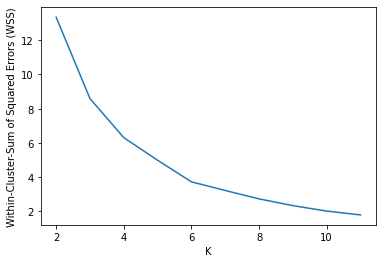

In [36]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss);

From the above graph, it looks like there is a bend between `5` and `6`

#### ii) The Silhouette Method

In [38]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics

for i in range(2, 13):
    labels = cluster.KMeans(n_clusters=i, random_state=200).fit(pca_df).labels_
    score = metrics.silhouette_score(pca_df, labels, metric="euclidean", sample_size=1000, random_state=200)
    print("Silhoute score for k value : ", str(i), ", is ", str(score))

Silhoute score for k value :  2 , is  0.47362694075028583
Silhoute score for k value :  3 , is  0.4483908275384475
Silhoute score for k value :  4 , is  0.43785291876777566
Silhoute score for k value :  5 , is  0.45130680489606634
Silhoute score for k value :  6 , is  0.4507847568968469
Silhoute score for k value :  7 , is  0.4458795480456887
Silhoute score for k value :  8 , is  0.4132957148795123
Silhoute score for k value :  9 , is  0.41704286100651067
Silhoute score for k value :  10 , is  0.4309783655094101
Silhoute score for k value :  11 , is  0.42535265774570696
Silhoute score for k value :  12 , is  0.41447250981390865


#### Applying Kmeans with 5 Clusters (`K=5`)

In [39]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(pca_df)

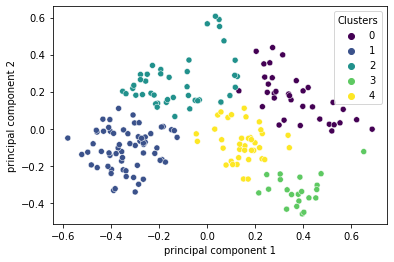

In [40]:
pca_df['Clusters'] = kmeans.labels_
sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df,palette='viridis');